# تحلیل داده های شکلات ها و راه اندازی کسب و کار فروش شکلات

In [35]:
import numpy as np
import pandas as pd
from seaborn import set_theme
set_theme()

### خواندن داده ها

In [2]:
df = pd.read_csv('../data/chocolate.csv')
df.head()

,Company,Specific Bean\nOrigin,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,2016,63%,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70%,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,Blend,Peru


In [3]:
df.shape

(1795, 8)

In [4]:
df.columns = df.columns.map(lambda x: x.replace('\n', ' '))
df.columns

Index(['Company', 'Specific Bean Origin', 'Review Date', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   object 
 4   Company Location      1795 non-null   object 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   object 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.3+ KB


### تغییر نوع داده ها به رشته

In [6]:
cols = ['Company', 'Specific Bean Origin', 'Cocoa Percent', 'Company Location', 'Bean Type', 'Broad Bean Origin']
for col in cols:
    df[col] = df[col].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   string 
 1   Specific Bean Origin  1795 non-null   string 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   string 
 4   Company Location      1795 non-null   string 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   string 
 7   Broad Bean Origin     1794 non-null   string 
dtypes: float64(1), int64(1), string(6)
memory usage: 112.3 KB


### تبدیل درصد کاکائو به عدد

In [7]:
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda x: float(x[:-1])).astype(float)
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,2016,63.0,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70.0,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70.0,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70.0,France,3.50,Blend,Peru


### فراوانی درصد کاکائو ها

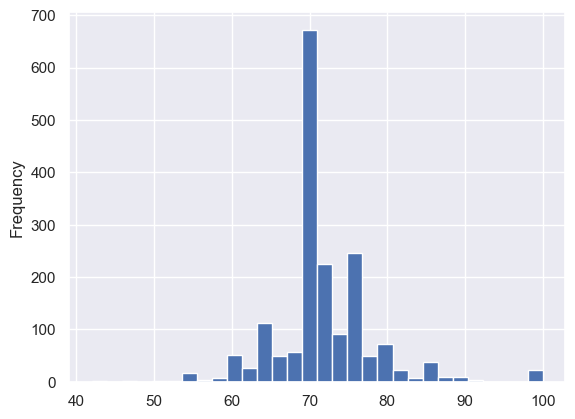

In [8]:
df['Cocoa Percent'].plot(kind='hist', bins = 30);

### نرمال سازی امتیاز

In [9]:
df['Rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min()) * 100
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,2016,63.0,France,68.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70.0,France,43.75,Blend,Togo
2,A. Morin,Atsane,2015,70.0,France,50.00,Blend,Togo
3,A. Morin,Akata,2015,70.0,France,62.50,Blend,Togo
4,A. Morin,Quilla,2015,70.0,France,62.50,Blend,Peru


### تخمین قیمت شکلات

In [10]:
df['price(100g)'] = 25 * df['Rating'] * df['Cocoa Percent']
df.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,A. Morin,Agua Grande,2016,63.0,France,68.75,Blend,Sao Tome,108281.25
1,A. Morin,Kpime,2015,70.0,France,43.75,Blend,Togo,76562.50
2,A. Morin,Atsane,2015,70.0,France,50.00,Blend,Togo,87500.00
3,A. Morin,Akata,2015,70.0,France,62.50,Blend,Togo,109375.00
4,A. Morin,Quilla,2015,70.0,France,62.50,Blend,Peru,109375.00


### تحلیل شکلات تلخ

In [11]:
dark_chocolates = df[df['Cocoa Percent'] > 70].reset_index(drop=True)
dark_chocolates.head()

,Company,Specific Bean Origin,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,price(100g)
0,Adi,"Vanua Levu, Toto-A",2011,80.0,Fiji,56.25,Trinitario,Fiji,112500.00
1,Adi,Vanua Levu,2011,88.0,Fiji,62.50,Trinitario,Fiji,137500.00
2,Adi,"Vanua Levu, Ami-Ami-CA",2011,72.0,Fiji,62.50,Trinitario,Fiji,112500.00
3,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",2011,75.0,Switzerland,68.75,Trinitario,Indonesia,128906.25
4,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",2010,75.0,Switzerland,43.75,Criollo,Madagascar,82031.25


### افزایش 10 درصدی قیمت نوع خاص

In [12]:
dark_chocolates['price(100g)'] = dark_chocolates.apply(lambda row: row['price(100g)'] * 1.1 if row['Bean Type'] == 'Trinitario' else row['price(100g)'], axis=1)

### مجموع سود روی فروش شکلات تلخ

In [13]:
print(f"{round(dark_chocolates['price(100g)'].sum().item()):,} تومان")

81,714,109 تومان


### تحلیل شکلات های غیر تلخ

In [14]:
df = df[df['Cocoa Percent'] <= 70].reset_index(drop=True)

### میانگین امتیاز شرکت ها در هر سال

In [25]:
companies = df.groupby(['Company', 'Review Date']).agg({'Rating': 'mean'}).unstack()
companies.columns.name = None
companies.index.name = None
companies

Rating                                               \
Review Date              2006 2007 2008    2009    2010    2011       2012   
A. Morin                  NaN  NaN  NaN     NaN     NaN     NaN  65.625000   
AMMA                      NaN  NaN  NaN     NaN  71.875     NaN        NaN   
Acalli                    NaN  NaN  NaN     NaN     NaN     NaN        NaN   
Adi                       NaN  NaN  NaN     NaN     NaN  43.750        NaN   
Aequare (Gianduja)        NaN  NaN  NaN  46.875     NaN     NaN        NaN   
...                       ...  ...  ...     ...     ...     ...        ...   
Zokoko                    NaN  NaN  NaN     NaN     NaN  62.500        NaN   
Zotter                    NaN  NaN  NaN     NaN  50.000  59.375  61.607143   
hello cocoa               NaN  NaN  NaN     NaN     NaN     NaN        NaN   
hexx                      NaN  NaN  NaN     NaN     NaN     NaN        NaN   
twenty-four blackbirds    NaN  NaN  NaN     NaN     NaN     NaN        NaN   

                                                              
Review Date                  2013  2014     2015   2016 2017  
A. Morin                57.954545  62.5  54.6875  68.75  NaN  
AMMA                          NaN   NaN      NaN    NaN  NaN  
Acalli                        NaN   NaN  68.7500    NaN  NaN  
Adi                           NaN   NaN      NaN    NaN  NaN  
Aequare (Gianduja)            NaN   NaN      NaN    NaN  NaN  
...                           ...   ...      ...    ...  ...  
Zokoko                        NaN   NaN      NaN  56.25  NaN  
Zotter                        NaN   NaN      NaN    NaN  NaN  
hello cocoa                   NaN   NaN  43.7500    NaN  NaN  
hexx                          NaN   NaN  50.0000    NaN  NaN  
twenty-four blackbirds  56.250000   NaN      NaN    NaN  NaN  

[313 rows x 12 columns]

### شکلات های مناسب فروش براساس 10 شرکت برتر

In [34]:
best_ratings = companies.iloc[:, 6:].mean(axis=1).sort_values(ascending=False).head(10)
best_ratings

Patric                                  75.000000
Willie's Cacao                          75.000000
Tobago Estate (Pralus)                  75.000000
Matale                                  71.875000
L.A. Burdick (Felchlin)                 71.875000
Pacari                                  71.875000
Valrhona                                70.833333
El Rey                                  68.750000
Heirloom Cacao Preservation (Zokoko)    68.750000
Cacao de Origen                         68.750000
dtype: float64

In [38]:
chocolates_to_sell = df[df['Company'].isin(best_ratings.index)]

### مجموع سود روی فروش شکلات های غیر تلخ

In [39]:
print(f"{round(chocolates_to_sell['price(100g)'].sum().item()):,} تومان")

5,287,891 تومان
